Mounted at /content/gdrive
gdrive	sample_data
/content/gdrive/My Drive/colorectal
colorectal-histology-predictions-cnn-88-accuracy.ipynb	Untitled0.ipynb
hmnist_64_64_L.csv


Test read csv files

In [ ]:
from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)
drive.mount('/content/gdrive')
!ls
%cd gdrive/My\ Drive/colorectal/
!ls

In [ ]:
#!pip install tensorflow==2.8

In [ ]:
# importing the libraries

import numpy as np 
import pandas as pd 

from tensorflow import keras
# from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten
# from keras.models import Sequential
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix

In [ ]:
#data = pd.read_csv("../input/hmnist_64_64_L.csv")      # reading the data
data = pd.read_csv("./hmnist_28_28_L.csv")      # reading the data

In [ ]:
Y = data["label"]
data.drop(["label"],axis=1, inplace=True)
X = data

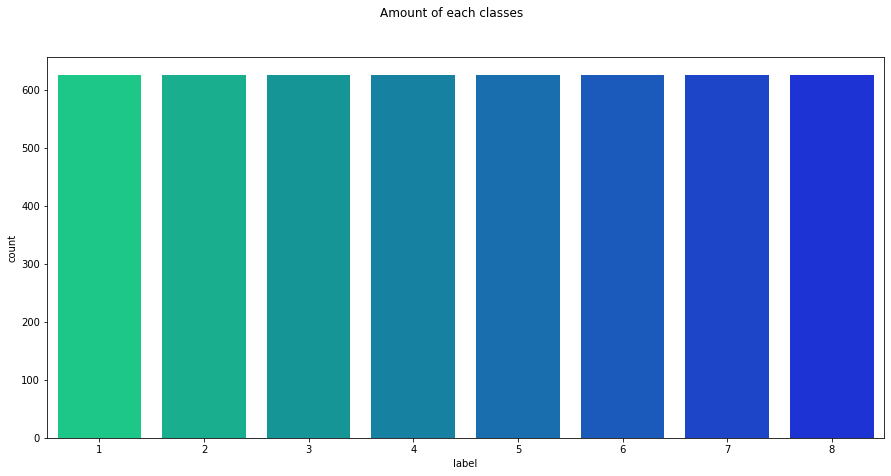

In [ ]:
# creating the countplot

plt.figure(figsize=(15,7))
g = sns.countplot(Y, palette="winter_r")
plt.suptitle("Amount of each classes")
plt.show()

In [ ]:
# it is very well balanced
Y.value_counts()         # each are 625 per column (perfect dataset?)

2    625
5    625
7    625
6    625
8    625
1    625
4    625
3    625
Name: label, dtype: int64

In [ ]:
X = X / 255.0     # scaling by hand since we know the max value

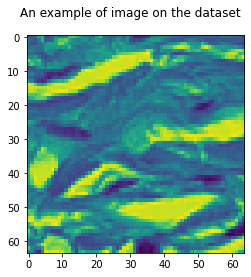

In [ ]:
#img = X.iloc[75].as_matrix()  #old
img = X.iloc[75].to_numpy()  #leon, new
img = img.reshape(64,64)
plt.imshow(img)
plt.suptitle("An example of image on the dataset")
plt.show()

In [ ]:
# Reshaping
img_size=28

# X = X.values.reshape(-1,28,28,1)       # shaping for the Keras
# Y = Y.values

In [ ]:
# Label Encoding 
# from keras.utils.np_utils import to_categorical # convert to one-hot-encoding for better results
# Y = to_categorical(Y)

In [ ]:
# Splitting train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
# normalize
x_train = np.array(x_train).reshape(-1, img_size, img_size, 1)
x_train = x_train / 255.0
y_train = np.array(y_train)



In [ ]:
print("x_train.shape: ",x_train.shape)
print("x_test.shape: ",x_test.shape)
print("y_train.shape: ",y_train.shape)
print("y_test.shape: ",y_test.shape)
# print(x_train[0:5])